Cột Input không có giá trị âm.
Cột Output không có giá trị âm.
Cột Inquiry không có giá trị âm.
Cột File không có giá trị âm.
Cột FPAdj không có giá trị âm.
Cột RawFPcounts không có giá trị âm.
Cột AdjFP không có giá trị âm.
Cột Effort không có giá trị âm.


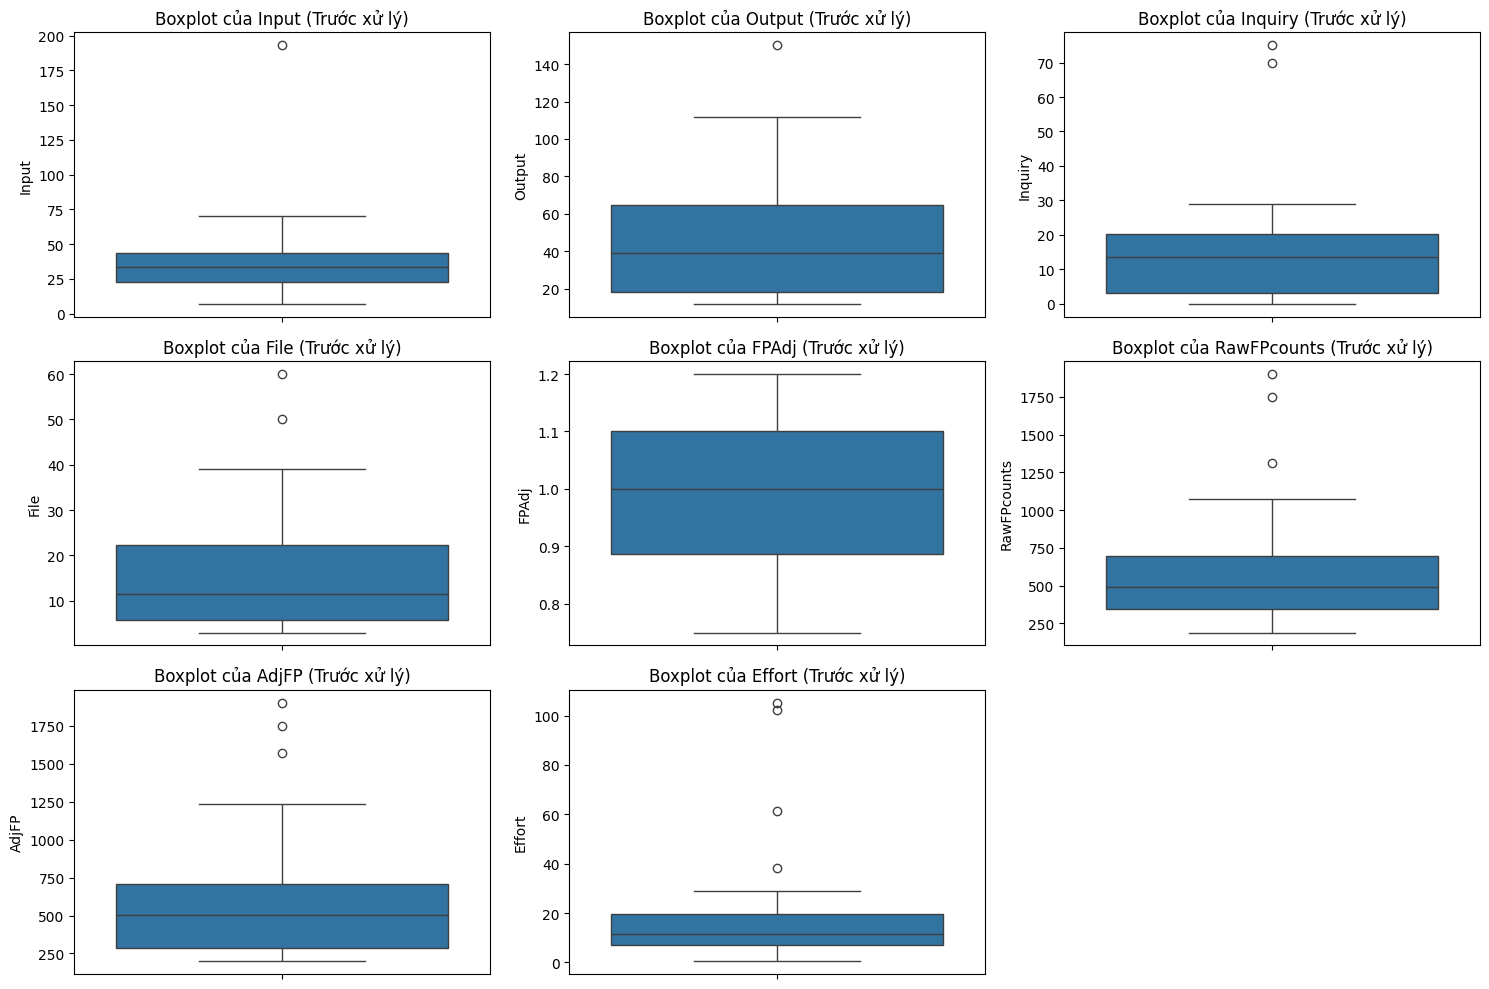

Đã xử lý ngoại lai ở cột Input: lower_bound=-7.75, upper_bound=74.25
Đã xử lý ngoại lai ở cột Output: lower_bound=-50.50, upper_bound=133.50
Đã xử lý ngoại lai ở cột Inquiry: lower_bound=-22.25, upper_bound=45.75
Đã xử lý ngoại lai ở cột File: lower_bound=-19.00, upper_bound=47.00
Đã xử lý ngoại lai ở cột FPAdj: lower_bound=0.57, upper_bound=1.42
Đã xử lý ngoại lai ở cột RawFPcounts: lower_bound=-180.68, upper_bound=1227.52
Đã xử lý ngoại lai ở cột AdjFP: lower_bound=-346.62, upper_bound=1344.38
Đã xử lý ngoại lai ở cột Effort: lower_bound=-11.41, upper_bound=38.09


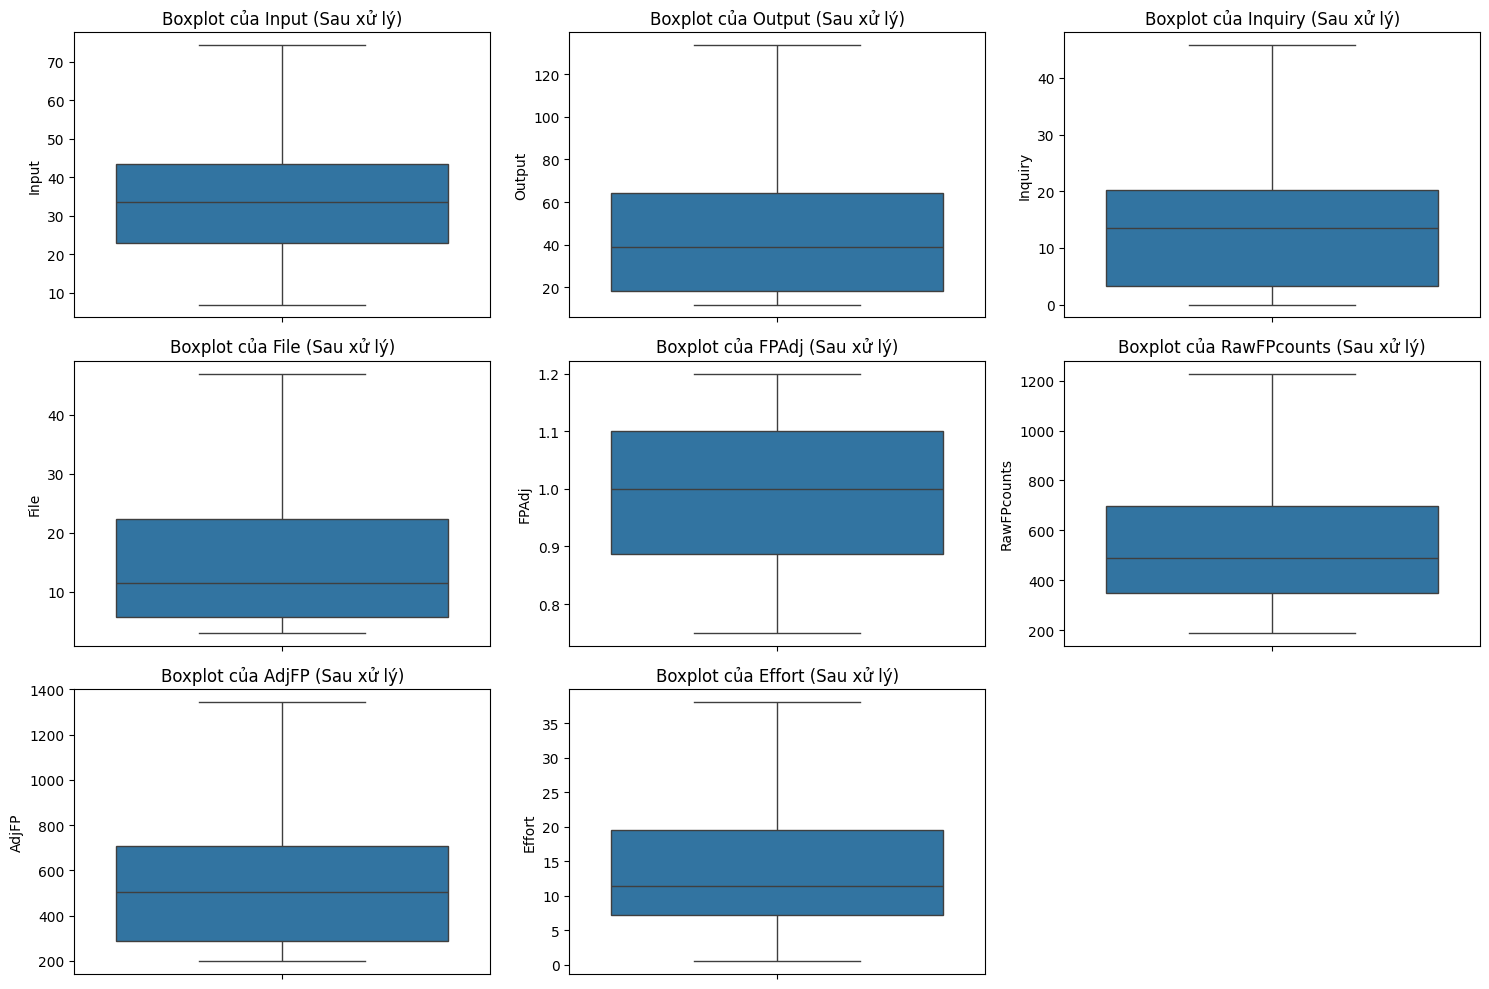

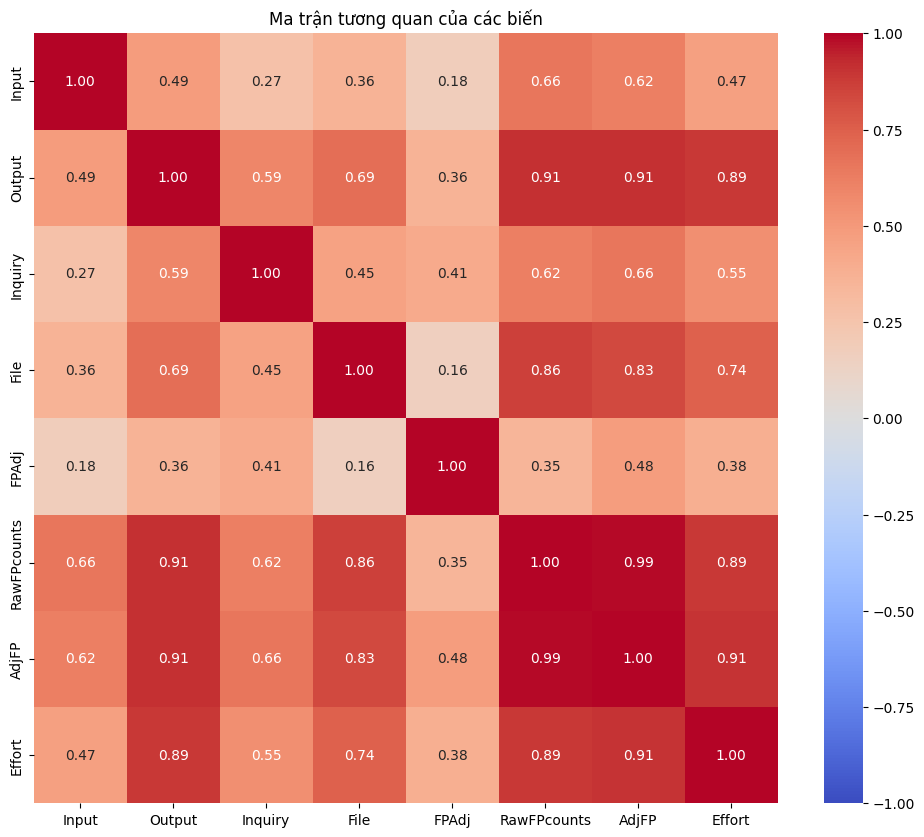

Đã loại cột AdjFP dựa trên quan sát heatmap (tương quan cao với RawFPcounts).

Đã chuẩn hóa dữ liệu bằng StandardScaler (trung bình = 0, độ lệch chuẩn = 1).

Tóm tắt dữ liệu sau khi xử lý:
Số dòng: 24
Số cột: 7

Thông tin kiểu dữ liệu:
Input          float64
Output         float64
Inquiry        float64
File           float64
FPAdj          float64
RawFPcounts    float64
Effort         float64
dtype: object

Thống kê mô tả:
              Input     Output       Inquiry          File         FPAdj  \
count  2.400000e+01  24.000000  2.400000e+01  2.400000e+01  2.400000e+01   
mean  -1.110223e-16   0.000000 -3.700743e-17  7.401487e-17 -2.960595e-16   
std    1.021508e+00   1.021508  1.021508e+00  1.021508e+00  1.021508e+00   
min   -1.497174e+00  -1.064120 -1.141891e+00 -1.011858e+00 -1.811304e+00   
25%   -6.507774e-01  -0.863996 -8.884988e-01 -8.088709e-01 -7.717732e-01   
50%   -9.532980e-02  -0.232836 -8.933717e-02 -3.844444e-01  7.875237e-02   
75%    4.336679e-01   0.552265  4.369400

In [6]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler

# Đọc file ARFF
with open('albrecht.arff', 'r') as file:
    lines = file.readlines()

# Tìm dòng bắt đầu dữ liệu
data_start = lines.index('@data\n') + 1
data_lines = lines[data_start:]

# Lấy danh sách thuộc tính
attributes = []
for line in lines:
    if line.startswith('@attribute'):
        attr_name = line.split()[1]
        attributes.append(attr_name)

# Chuyển dữ liệu sang định dạng CSV
csv_data = []
for line in data_lines:
    line = line.strip()
    if line:
        line = re.sub(r'\s+', ',', line)
        csv_data.append(line)

# Ghi ra file CSV
with open('albrecht.csv', 'w') as f:
    f.write(','.join(attributes) + '\n')
    f.write('\n'.join(csv_data))

# Đọc file CSV
df = pd.read_csv('albrecht.csv')

# Kiểm tra và thay thế giá trị âm
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    negative_mask = df[col] < 0
    if negative_mask.any():
        print(f"Cột {col} có {negative_mask.sum()} giá trị âm")
        mean_value = df[col][~negative_mask].mean()
        df.loc[negative_mask, col] = mean_value
        print(f"Đã thay thế giá trị âm ở cột {col} bằng giá trị trung bình: {mean_value:.2f}")
    else:
        print(f"Cột {col} không có giá trị âm.")


# Lọc các cột số (không có biến phân loại trong dataset này)
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Vẽ boxplot trước khi xử lý ngoại lai
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot của {col} (Trước xử lý)')
plt.tight_layout()
plt.show()

# Xử lý ngoại lai bằng phương pháp clipping
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    print(f"Đã xử lý ngoại lai ở cột {col}: lower_bound={lower_bound:.2f}, upper_bound={upper_bound:.2f}")

# Vẽ boxplot sau khi xử lý ngoại lai
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot của {col} (Sau xử lý)')
plt.tight_layout()
plt.show()

# Tính và vẽ ma trận tương quan
corr_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, center=0)
plt.title('Ma trận tương quan của các biến')
plt.show()

# Loại cột dựa trên quan sát từ heatmap (giả sử loại AdjFP do tương quan cao với RawFPcounts)
# Bạn có thể thay đổi cột cần loại sau khi xem heatmap
df = df.drop('AdjFP', axis=1)
print("Đã loại cột AdjFP dựa trên quan sát heatmap (tương quan cao với RawFPcounts).")

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
print("\nĐã chuẩn hóa dữ liệu bằng StandardScaler (trung bình = 0, độ lệch chuẩn = 1).")

# Ghi lại file CSV sau khi xử lý
df.to_csv('albrecht_cleaned.csv', index=False)

# Tóm tắt dữ liệu
print("\nTóm tắt dữ liệu sau khi xử lý:")
print(f"Số dòng: {len(df)}")
print(f"Số cột: {len(df.columns)}")
print("\nThông tin kiểu dữ liệu:")
print(df.dtypes)
print("\nThống kê mô tả:")
print(df.describe())
print("\nSố giá trị thiếu:")
print(df.isnull().sum())